In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("IPL IMB381IPL2013.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

## Feature and target preparation

Here we drop 'SOLD PRICE' since it is our target.

'PLAYER NAME' does not contribute to anything, instead helps model to memorize instead of learning. So we also drop it.

In [3]:
X = data.drop(['SOLD PRICE', 'PLAYER NAME'], axis=1)
y = data['SOLD PRICE']

X

,Sl.NO.,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,...,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE
0,1,2,SA,KXIP,Allrounder,0,0,0,0.00,0,...,0.00,0.00,0,307,15,20.47,8.90,13.93,2009,50000
1,2,2,BAN,RCB,Bowler,214,18,657,71.41,185,...,0.00,0.00,0,29,0,0.00,14.50,0.00,2008,50000
2,3,2,IND,KKR,Bowler,571,58,1269,80.62,288,...,18.56,121.01,5,1059,29,36.52,8.81,24.90,2008,200000
3,4,1,IND,CSK,Bowler,284,31,241,84.56,51,...,5.80,76.32,0,1125,49,22.96,6.23,22.14,2011,100000
4,5,2,IND,CSK,Batsman,63,0,79,45.93,0,...,32.93,120.71,28,0,0,0.00,0.00,0.00,2011,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,126,2,IND,DC,Batsman,0,0,0,0.00,0,...,9.80,125.64,2,0,0,0.00,0.00,0.00,2010,50000
126,127,2,PAK,RR,Batsman,6398,7,6814,75.78,3,...,3.00,42.85,0,0,0,0.00,0.00,0.00,2008,225000
127,128,2,IND,KXIP+,Batsman,1775,9,8051,87.58,109,...,26.32,131.88,67,569,23,24.74,7.02,21.13,2011,400000
128,129,2,IND,MI+,Bowler,1114,288,790,73.55,278,...,9.90,91.67,1,1783,65,27.43,7.75,21.26,2008,200000


In [4]:
categoricalCols = X.select_dtypes(include=['object']).columns # Columns containing texts
numericCols = X.select_dtypes(include=['number']).columns # Columns containing numbers

print("Categorical:", list(categoricalCols))
print("Numeric:", list(numericCols))


Categorical: ['COUNTRY', 'TEAM', 'PLAYING ROLE']
Numeric: ['Sl.NO.', 'AGE', 'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL', 'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE']


## Encoding categorical variables

We perform one-hot encoding for the categorical columns. We also remove one dummy per category to avoid multicollinearity.

In [19]:
encodedX = pd.get_dummies(X, drop_first=True)

print(encodedX.shape)
print(encodedX.columns)

# encodedX

(130, 49)
Index(['Sl.NO.', 'AGE', 'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B',
       'ODI-WKTS', 'ODI-SR-BL', 'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B',
       'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR',
       'BASE PRICE', 'COUNTRY_BAN', 'COUNTRY_ENG', 'COUNTRY_IND', 'COUNTRY_NZ',
       'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL', 'COUNTRY_WI', 'COUNTRY_ZIM',
       'TEAM_CSK+', 'TEAM_DC', 'TEAM_DC+', 'TEAM_DD', 'TEAM_DD+', 'TEAM_KKR',
       'TEAM_KKR+', 'TEAM_KXI+', 'TEAM_KXIP', 'TEAM_KXIP+', 'TEAM_MI',
       'TEAM_MI+', 'TEAM_RCB', 'TEAM_RCB+', 'TEAM_RR', 'TEAM_RR+',
       'PLAYING ROLE_Batsman', 'PLAYING ROLE_Bowler',
       'PLAYING ROLE_W. Keeper'],
      dtype='object')


## Splitting data

In [6]:
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(encodedX, y, test_size=0.2, random_state=42)

We perform feature scaling here to standardize all features to mean = 0, std = 1.

Scaler was fitted on training data, then applied to test data. This ensures no data leakage.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaledTrainX = scaler.fit_transform(trainX)
scaledTestX = scaler.transform(testX)


# Scaling can be performed on y; however, predictions need to be inverse_transform.
scaledTrainY = (trainY - trainY.mean()) / trainY.std()
scaledTestY = (testY - testY.mean()) / testY.std()

## Train linear regression

In [8]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(scaledTrainX, trainY)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
linreg.intercept_

np.float64(522682.6923076942)

## Plotting the coefficient values

We first create a dataframe of the features and their coefficients. This is then sorted to understand which features are more important to the model.

Each bar represents:

> “How much the predicted SOLD PRICE changes when this feature increases by 1 unit (in scaled space), holding all other features constant.” 

Positive coefficients increase the predicted auction price. While negative values decrease it.

In [ ]:
featureDF = pd.DataFrame(
    {
        'columns': encodedX.columns,
        'coeffs': linreg.coef_
    }
)

sortedCoeffVals = featureDF.sort_values('coeffs', ascending=False)

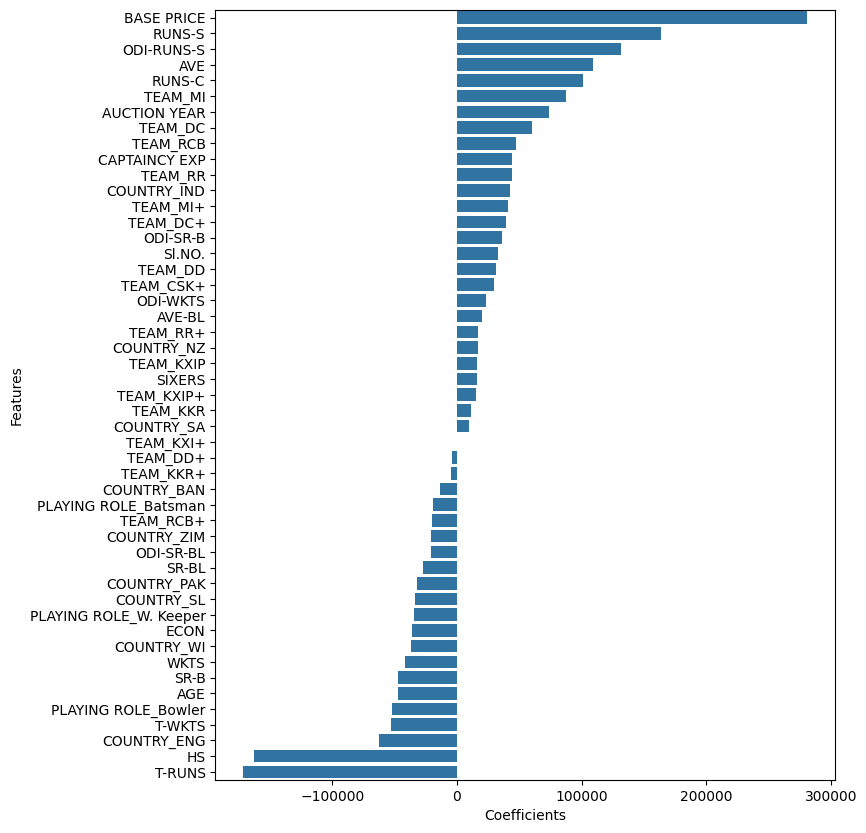

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,10))
sns.barplot(data=sortedCoeffVals, x='coeffs', y='columns')
plt.xlabel('Coefficients')
plt.ylabel('Features')
plt.show()

## Evaluating predictions

We use RMSE to understand model's ability to correctly predict the values.

In [12]:
trainPredY = linreg.predict(scaledTrainX)

testPredY = linreg.predict(scaledTestX)

In [13]:
from sklearn import metrics

rmseTrain = np.sqrt(metrics.mean_squared_error(y_true=trainY, y_pred=trainPredY))
rmseTest = np.sqrt(metrics.mean_squared_error(y_true=testY, y_pred=testPredY))

print(f'Train RMSE: {rmseTrain}\nTest RMSE: {rmseTest}')


Train RMSE: 216376.93319289215
Test RMSE: 325834.93435511534


Here the large difference indicates that the model may be overfitting on the training data.

In [14]:
print("Target stats:")
print(y.describe())

Target stats:
count    1.300000e+02
mean     5.212231e+05
std      4.068074e+05
min      2.000000e+04
25%      2.250000e+05
50%      4.375000e+05
75%      7.000000e+05
max      1.800000e+06
Name: SOLD PRICE, dtype: float64


We can visualize if our target is skewed.

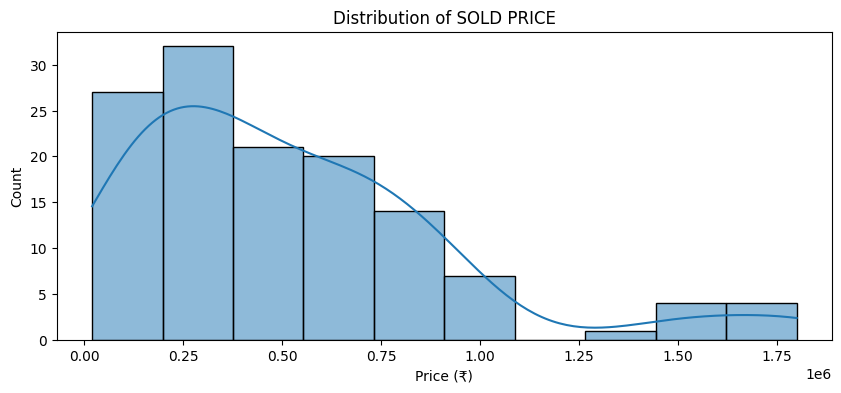

In [15]:
plt.figure(figsize=(10, 4))
sns.histplot(y, kde=True)
plt.title('Distribution of SOLD PRICE')
plt.xlabel('Price (₹)')
plt.show()

## Regularization (L1, L2)

Without regularization, model fits training data too closely. It results in overfitting, as seen by difference of nearly 10,000(rmseTrain - rmseTest).


In [16]:
from sklearn.linear_model import Lasso, Ridge


alphas = [1, 10, 100, 1000]

for alpha in alphas:
    lasso = Lasso(alpha=alpha)

    lasso.fit(scaledTrainX, trainY)

    lassoTrainPredictY = lasso.predict(scaledTrainX)
    lassoTestPredictY = lasso.predict(scaledTestX)

    rmseTrain = np.sqrt(metrics.mean_squared_error(y_true=trainY, y_pred=lassoTrainPredictY))
    rmseTest = np.sqrt(metrics.mean_squared_error(y_true=testY, y_pred=lassoTestPredictY))
    
    print(f"lasso α={alpha}: Train={rmseTrain}, Test={rmseTest}")

lasso α=1: Train=216376.93448295456, Test=325824.5579958327
lasso α=10: Train=216377.0621668514, Test=325731.3421719317
lasso α=100: Train=216389.8125984485, Test=324816.09767502913
lasso α=1000: Train=217153.20899963047, Test=317121.8640711693


Lasso performs poorly because Lasso can force coeefficients to exactly zero; which in intended for feature selection. If alpha is too high, Lasso can eliminate important features.

With ridge, coefficients are shrinked proportionally. It preserves all features but reduces their impact.
Now, model performs slightly worse on training data, but better on test data. This indicates that model can generalize well.

In [30]:
alphas = [1, 10, 100, 1000]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(scaledTrainX, trainY)
    
    ridgeTrainPredictY = ridge.predict(scaledTrainX)
    ridgeTestPredictY = ridge.predict(scaledTestX)

    train_rmse = np.sqrt(metrics.mean_squared_error(trainY, ridgeTrainPredictY))
    test_rmse = np.sqrt(metrics.mean_squared_error(testY, ridgeTestPredictY))
    
    print(f"Ridge α={alpha}: Train={train_rmse}, Test={test_rmse}")

Ridge α=1: Train=216823.29961178303, Test=316741.77817750705
Ridge α=10: Train=226873.06098796168, Test=288845.3144751316
Ridge α=100: Train=277007.8847992486, Test=274834.7075511657
Ridge α=1000: Train=363545.8483554235, Test=327382.672070994


## Visual

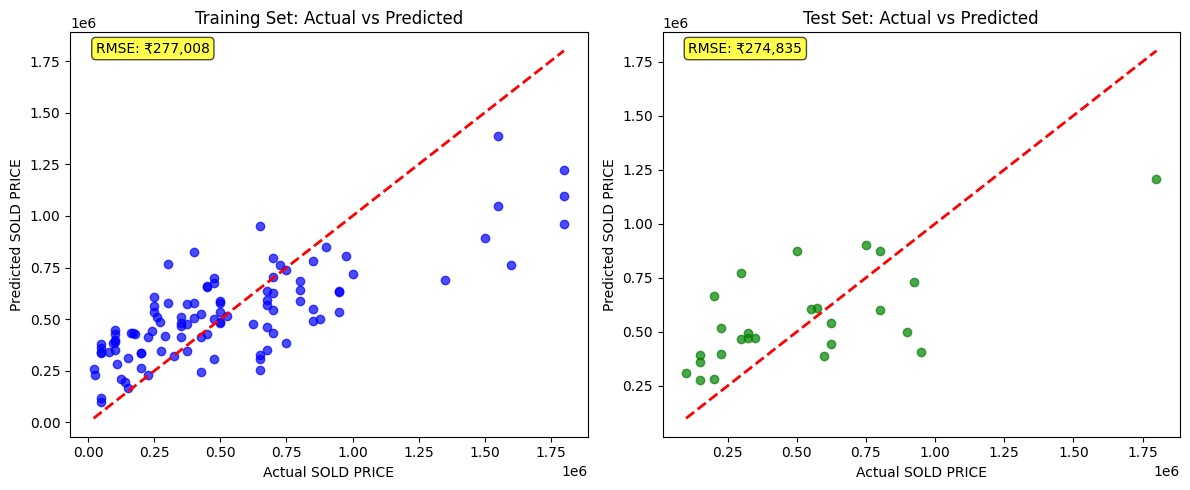

In [ ]:
ridge = Ridge(alpha=100)
ridge.fit(scaledTrainX, trainY)

train_pred = ridge.predict(scaledTrainX)
test_pred = ridge.predict(scaledTestX)

rmse_train_best = np.sqrt(metrics.mean_squared_error(trainY, train_pred))
rmse_test_best = np.sqrt(metrics.mean_squared_error(testY, test_pred))

plt.figure(figsize=(12, 5))

# Training set
plt.subplot(1, 2, 1)
plt.scatter(trainY, train_pred, alpha=0.7, color='blue')
plt.plot([trainY.min(), trainY.max()], [trainY.min(), trainY.max()], 'r--', lw=2)
plt.xlabel('Actual SOLD PRICE')
plt.ylabel('Predicted SOLD PRICE')
plt.title('Training Set: Actual vs Predicted')
plt.text(0.05, 0.95, f'RMSE: ₹{rmse_train_best:,.0f}', transform=plt.gca().transAxes, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

# Test set
plt.subplot(1, 2, 2)
plt.scatter(testY, test_pred, alpha=0.7, color='green')
plt.plot([testY.min(), testY.max()], [testY.min(), testY.max()], 'r--', lw=2)
plt.xlabel('Actual SOLD PRICE')
plt.ylabel('Predicted SOLD PRICE')
plt.title('Test Set: Actual vs Predicted')
plt.text(0.05, 0.95, f'RMSE: ₹{rmse_test_best:,.0f}', transform=plt.gca().transAxes,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

plt.tight_layout()
plt.show()

Residual = actual - predicted;

Positive indicates under-prediction, negative indicates over-prediction.
Zero indicates perfect prediction.

If model is well-specified, points should be randomly scattered around zero without any clear patterns. 

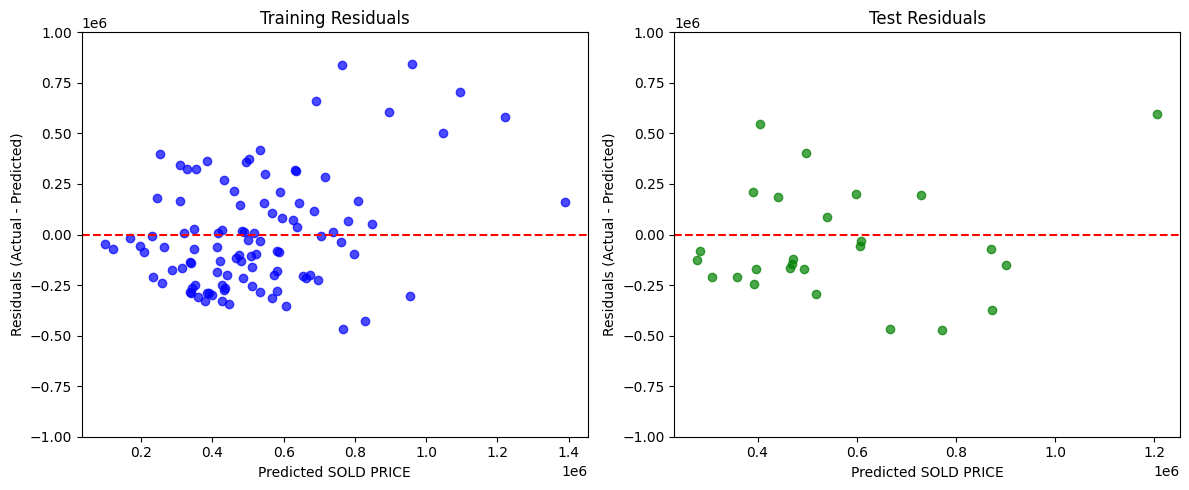

In [ ]:
train_residuals = trainY - train_pred
test_residuals = testY - test_pred

plt.figure(figsize=(12, 5))

# Training residuals
plt.subplot(1, 2, 1)
plt.scatter(train_pred, train_residuals, alpha=0.7, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted SOLD PRICE')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Training Residuals')
plt.ylim(-1000000, 1000000)

# Test residuals
plt.subplot(1, 2, 2)
plt.scatter(test_pred, test_residuals, alpha=0.7, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted SOLD PRICE')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Test Residuals')
plt.ylim(-1000000, 1000000)

plt.tight_layout()
plt.show()

Error distribution plot creates histogram of prediction errors / residuals. 

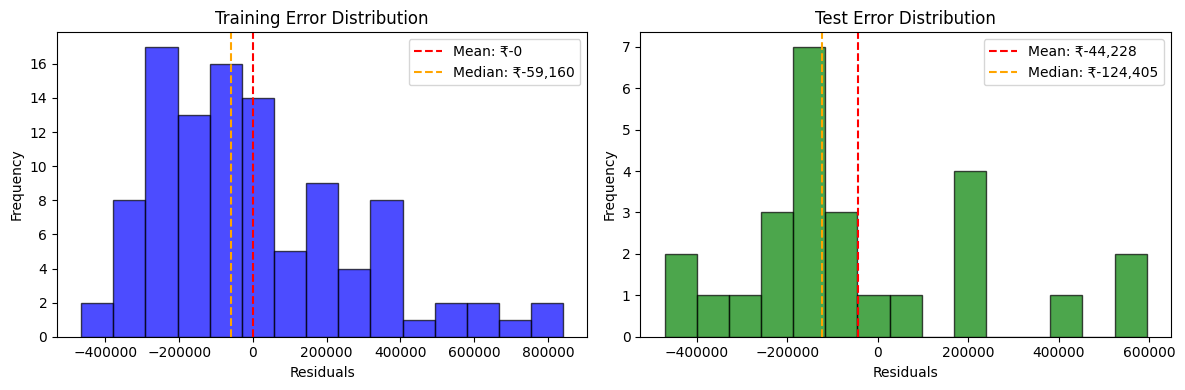

In [33]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(train_residuals, bins=15, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Training Error Distribution')
# Add stats
plt.axvline(train_residuals.mean(), color='red', linestyle='--', label=f'Mean: ₹{train_residuals.mean():,.0f}')
plt.axvline(train_residuals.median(), color='orange', linestyle='--', label=f'Median: ₹{train_residuals.median():,.0f}')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(test_residuals, bins=15, alpha=0.7, color='green', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Test Error Distribution')
plt.axvline(test_residuals.mean(), color='red', linestyle='--', label=f'Mean: ₹{test_residuals.mean():,.0f}')
plt.axvline(test_residuals.median(), color='orange', linestyle='--', label=f'Median: ₹{test_residuals.median():,.0f}')
plt.legend()

plt.tight_layout()
plt.show()

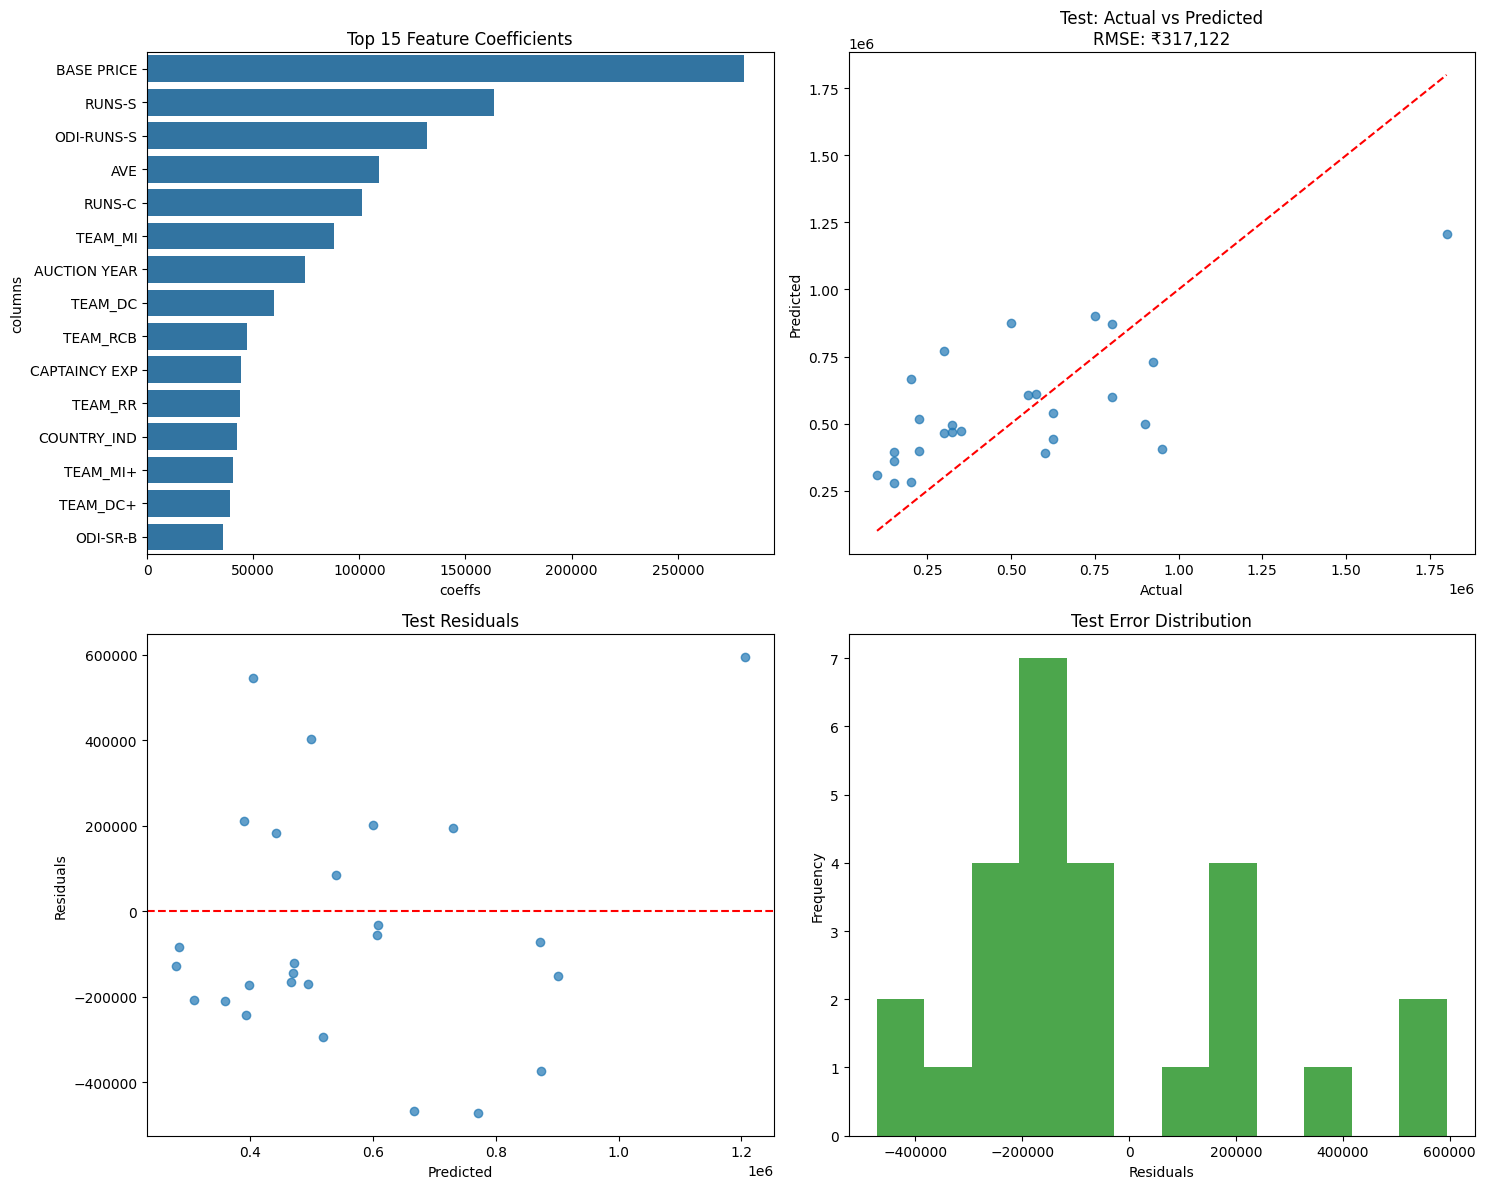

In [26]:
# Create a comprehensive dashboard
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Coefficients
sns.barplot(data=sortedCoeffVals.head(15), x='coeffs', y='columns', ax=axes[0,0])
axes[0,0].set_title('Top 15 Feature Coefficients')

# 2. Actual vs Predicted (Test)
axes[0,1].scatter(testY, test_pred, alpha=0.7)
axes[0,1].plot([testY.min(), testY.max()], [testY.min(), testY.max()], 'r--')
axes[0,1].set_xlabel('Actual')
axes[0,1].set_ylabel('Predicted')
axes[0,1].set_title(f'Test: Actual vs Predicted\nRMSE: ₹{rmseTest:,.0f}')

# 3. Residuals (Test)
axes[1,0].scatter(test_pred, test_residuals, alpha=0.7)
axes[1,0].axhline(y=0, color='r', linestyle='--')
axes[1,0].set_xlabel('Predicted')
axes[1,0].set_ylabel('Residuals')
axes[1,0].set_title('Test Residuals')

# 4. Error distribution
axes[1,1].hist(test_residuals, bins=12, alpha=0.7, color='green')
axes[1,1].set_xlabel('Residuals')
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_title('Test Error Distribution')

plt.tight_layout()
plt.show()